In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
d = xr.open_dataset('beta_data_linear_h1000_longx.nc')

In [3]:
d.coords['time'] = d.time / 86400
d

<xarray.Dataset>
Dimensions:    (alpha: 13, beta: 6, time: 25, x: 257, xb: 258, y: 129, yb: 130)
Coordinates:
  * x          (x) float64 -3.987e+07 -3.956e+07 -3.925e+07 -3.894e+07 ...
  * beta       (beta) int32 1 3 10 30 100 300
  * time       (time) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 ...
  * xb         (xb) float64 -4.003e+07 -3.972e+07 -3.941e+07 -3.91e+07 ...
  * alpha      (alpha) float64 -2.0 -1.0 -0.75 -0.5 -0.25 -0.1 0.0 0.1 0.25 ...
  * y          (y) float64 -9.93e+06 -9.775e+06 -9.62e+06 -9.464e+06 ...
  * yb         (yb) float64 -1.001e+07 -9.852e+06 -9.697e+06 -9.542e+06 ...
Data variables:
    u          (beta, alpha, time, y, xb) float64 0.0 0.0 0.0 0.0 0.0 0.0 ...
    phi        (beta, alpha, time, y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    v          (beta, alpha, time, yb, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ...
    phi_eq_xi  (beta, alpha, time, y, x) float64 4.629e-182 2.251e-179 ...
    phi_eq     (beta, alpha, time, y, x) float64 4.629e-18

(array([       0.,        0.,        0.,        0.,        0.,  2585934.,
               0.,        0.,        0.,        0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

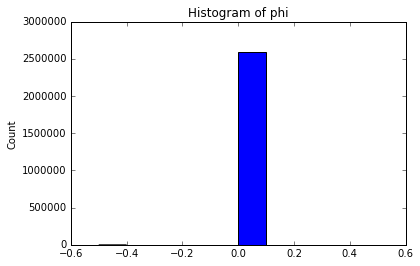

In [4]:
d.phi.isel(time=0).plot()
# plt.xlim(-.3e7, .3e7)
# plt.ylim(-.3e7, .3e7)


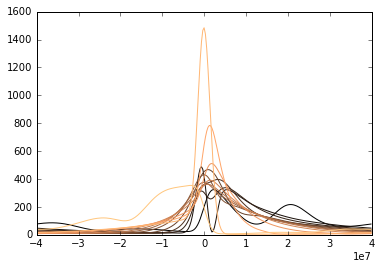

In [6]:
clrs = iter(plt.cm.copper(np.linspace(0, 1, len(d.alpha))))
for a in d.alpha:
    plt.plot(d.x, d.sel(alpha=a, beta=100).isel(time=-1).phi_xi.sum('y'), color=next(clrs))

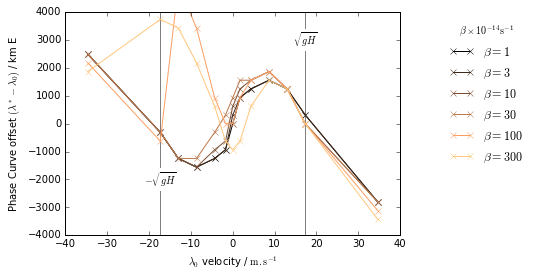

In [9]:
C = np.sqrt(300)
clrs = iter(plt.cm.copper(np.linspace(0, 1, len(d.beta))))
for b in d.beta:
    plt.plot(d.alpha*np.sqrt(300), d.x.isel(x=d.phi_xi.sel(time=24).sel(beta=b).sum('y').argmax('x'))/1e3, label='$\\beta=%d$' % b, c=next(clrs), marker='x')

plt.vlines([C, -C], -10000, 10000, color='gray', linestyle='-')

plt.text(C, 3000, '$\sqrt{gH}$',horizontalalignment='center', verticalalignment='center', 
       bbox=dict(facecolor='white', edgecolor='none', pad=2.0))
plt.text(-C, -2000, '$-\sqrt{gH}$',horizontalalignment='center', verticalalignment='center', 
       bbox=dict(facecolor='white', edgecolor='none', pad=2.0))
plt.ylim(-4000, 4000)
plt.xlabel(r'$\lambda_0$ velocity / $\mathrm{m.s^{-1}}$')
plt.ylabel('Phase Curve offset $(\lambda^* - \lambda_0)$ / km E')
plt.legend(title='$\\beta \\times 10^{-14} \mathrm{s^{-1}}$', bbox_to_anchor=(1.4,1), frameon=False)
#plt.savefig('beta_plane_offset.pdf', bbox_inches='tight')

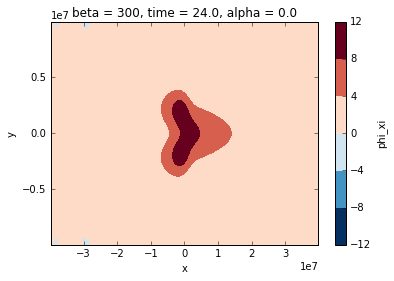

In [26]:
d.phi_xi.isel(time=-1).sel(beta=300, alpha=0).plot.contourf(subplot_kws={'aspect':'equal'})

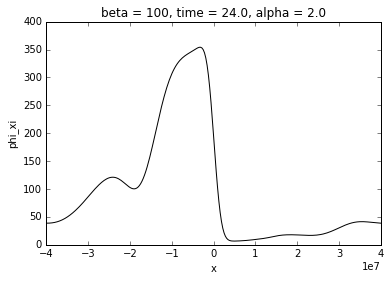

In [13]:
clrs = iter(plt.cm.copper(np.linspace(0, 1, len(d.alpha))))
for a in [2]:
    d.phi_xi.isel(time=-1).sel(beta=100, alpha=a).sum('y').plot(c=next(clrs))


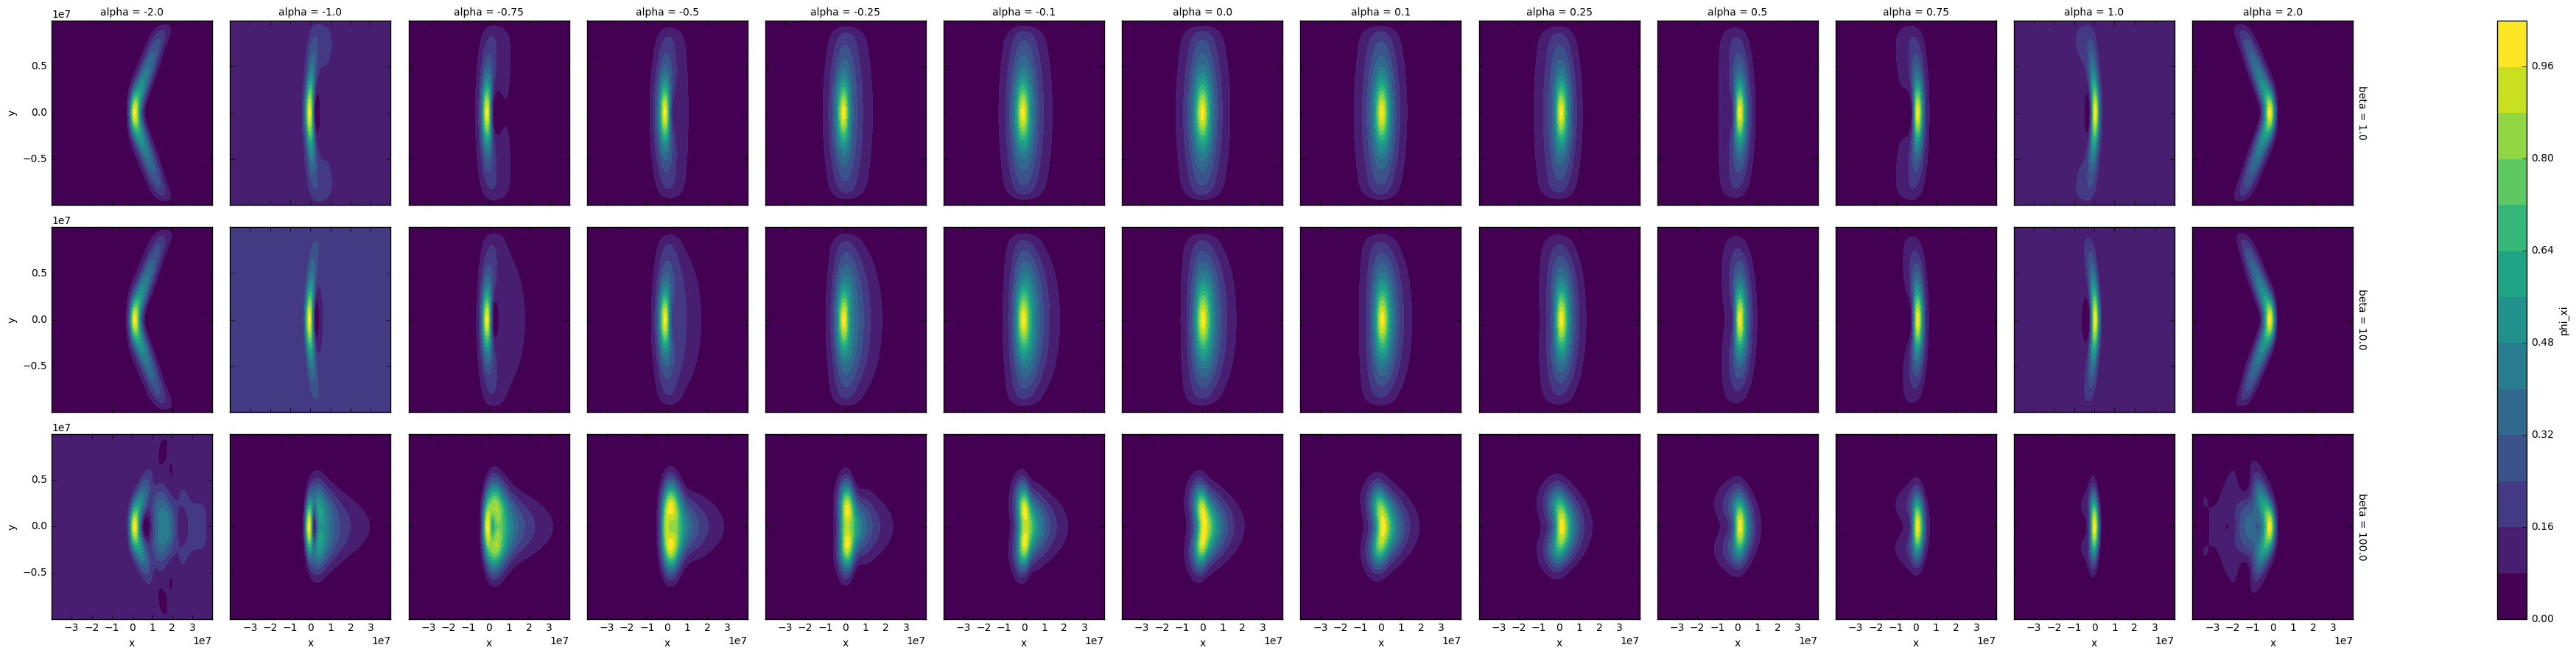

In [7]:
def normalise(data, dim=None):
    dmax = data.max(dim)
    dmin = data.min(dim)
    return (data - dmin) / (dmax - dmin)
    
d.phi_xi.isel(time=-1).pipe(normalise, dim=('x', 'y')).plot.contourf(col='alpha', row='beta', levels=13)

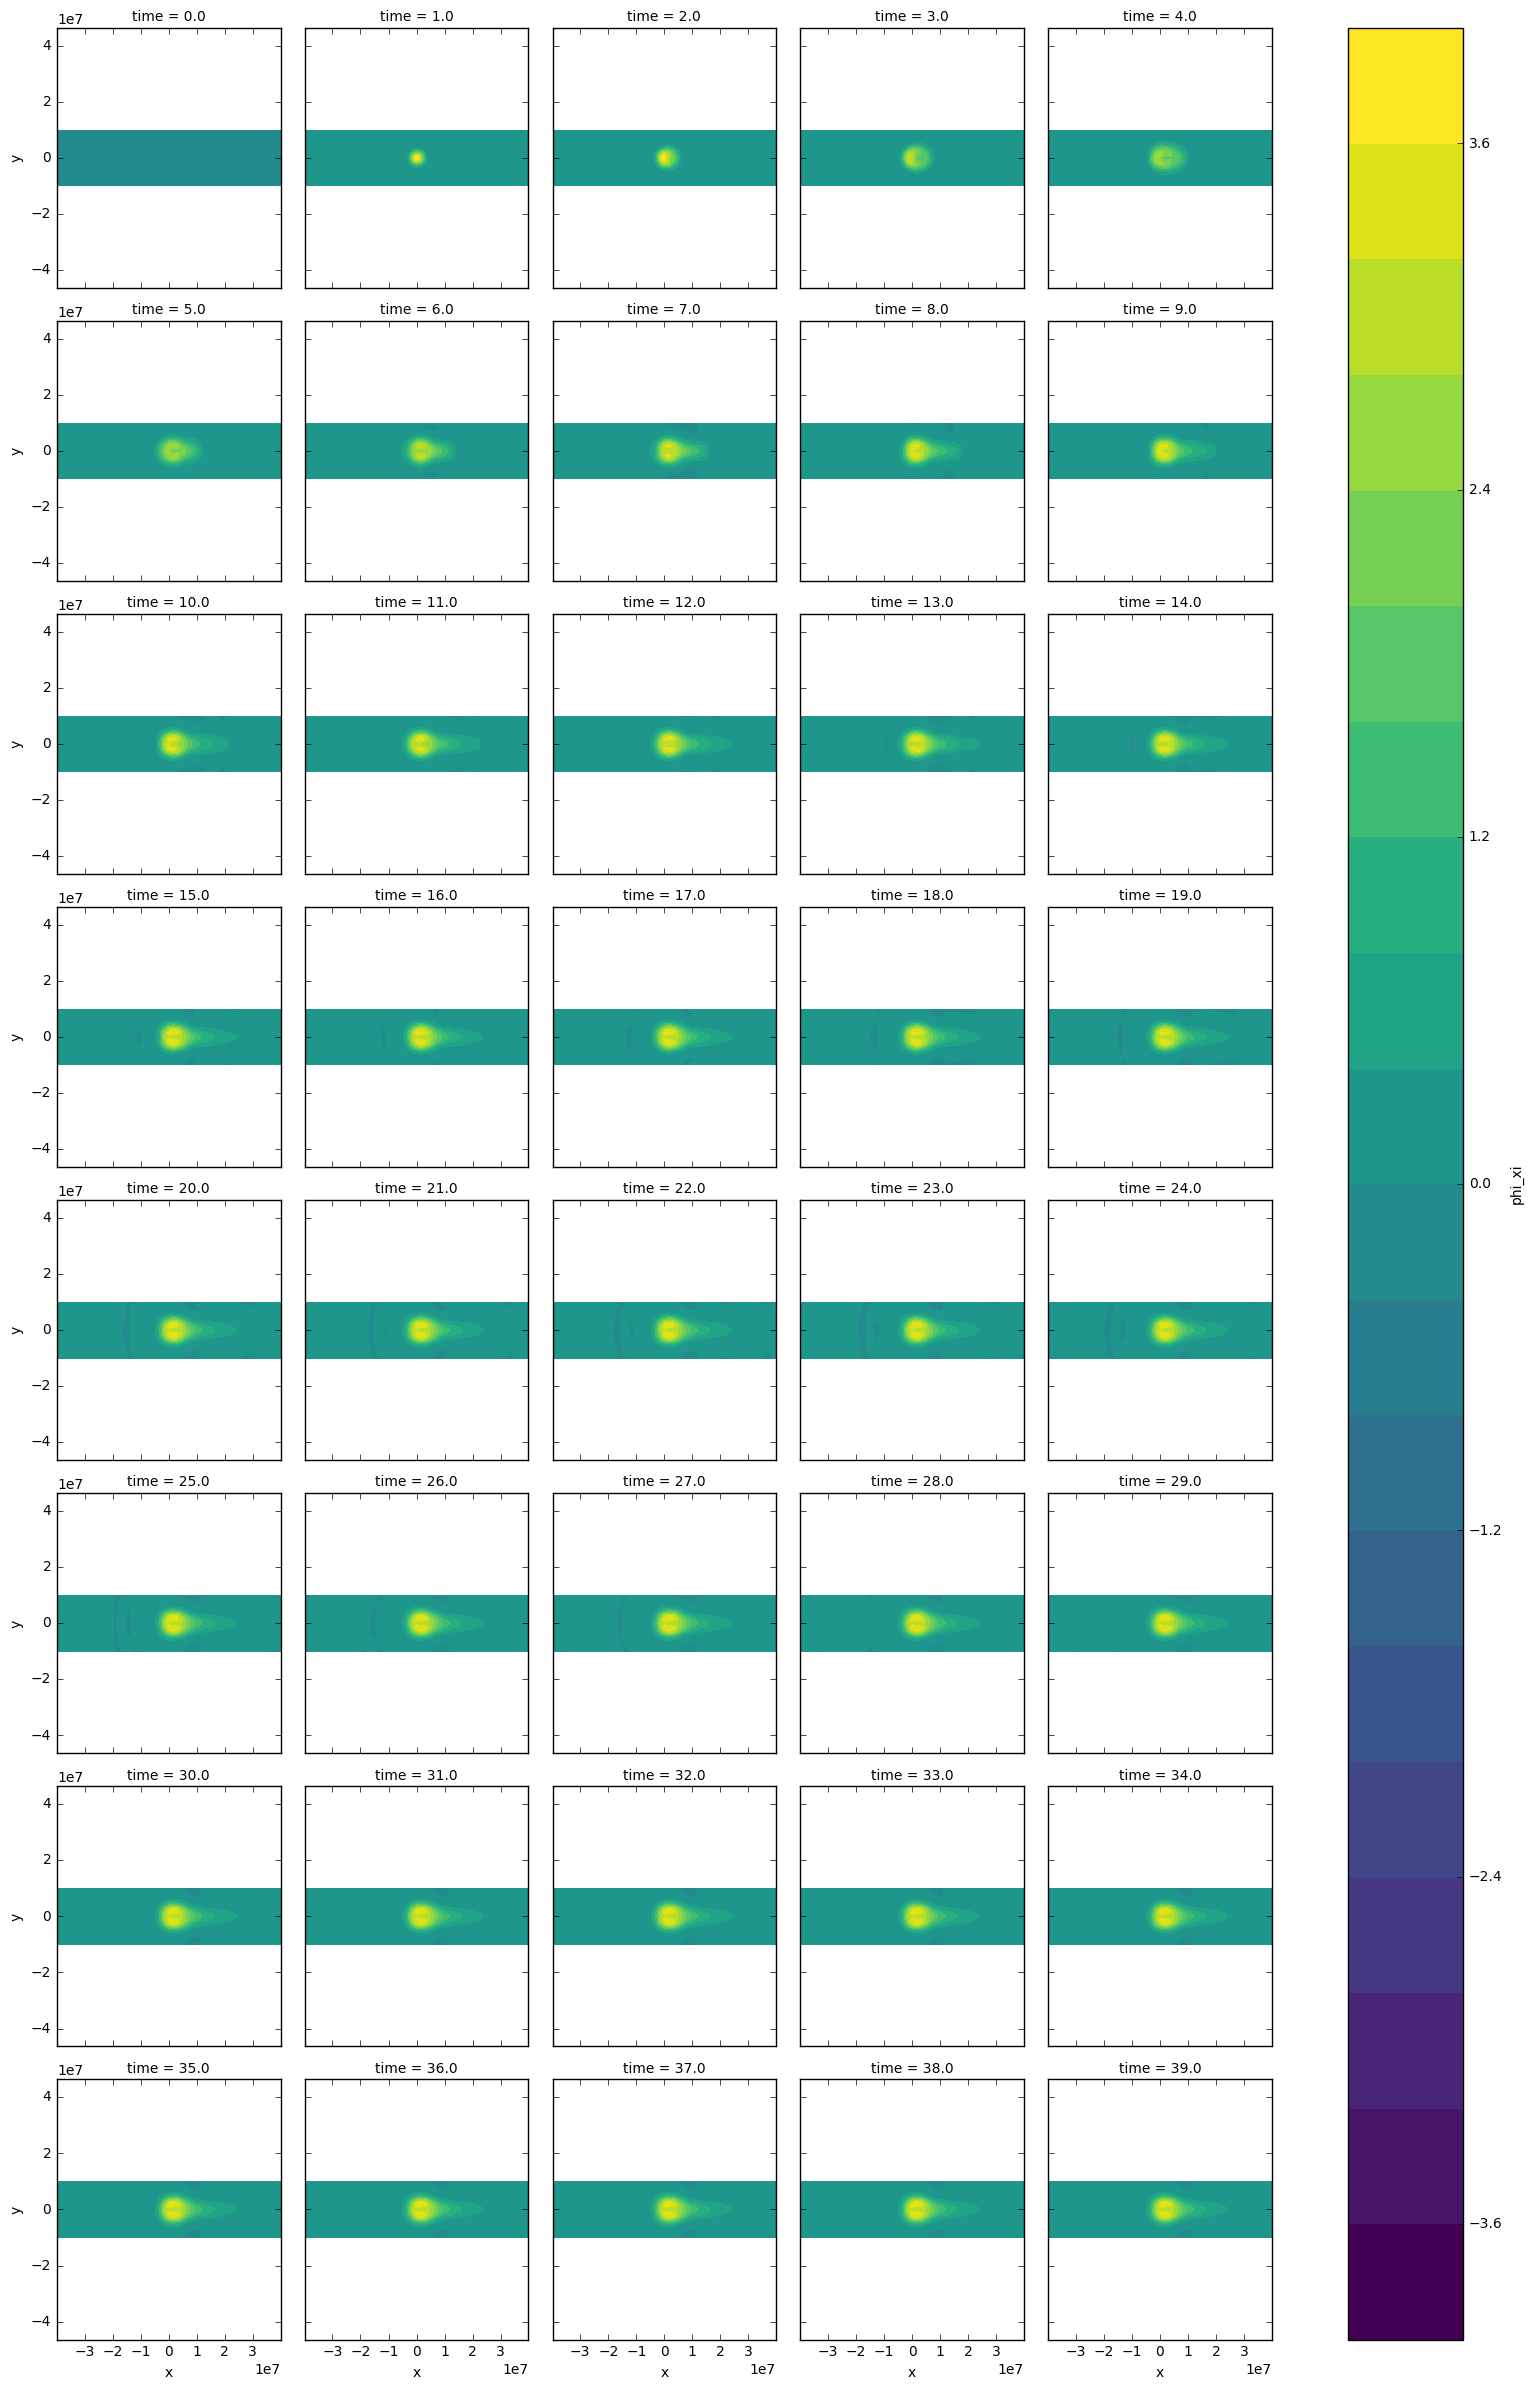

In [8]:
d.phi_xi.sel(beta=100, alpha=-.5).plot.contourf(levels=25, col='time', col_wrap=5, subplot_kws={'aspect':'equal'}, cmap=plt.cm.viridis)

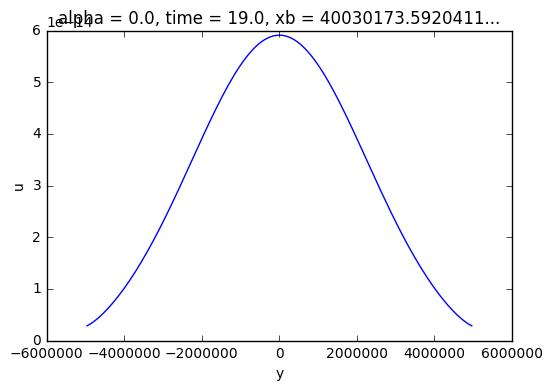

In [61]:
d.u.isel(time=-1, xb=-1).sel(beta=100, alpha=0).plot()

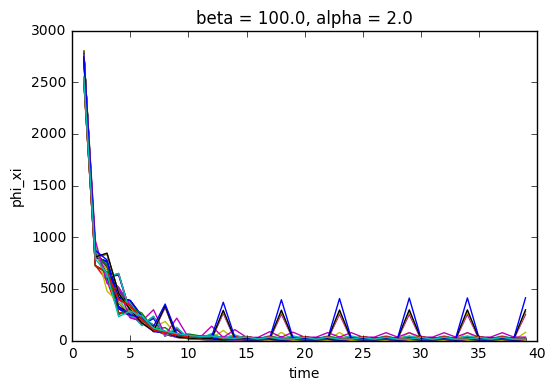

In [28]:
for a in d.alpha:
    for b in d.beta:
        (d.phi_xi.sel(alpha=a, beta=b).diff('time')**2).sum(('x', 'y')).plot()

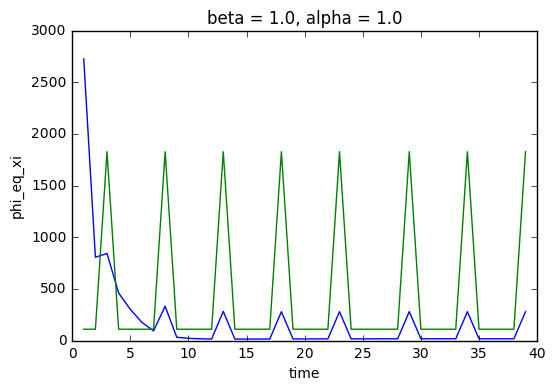

In [32]:
(d.phi_xi.sel(alpha=1, beta=1).diff('time')**2).sum(('x', 'y')).plot()
(d.phi_eq_xi.sel(alpha=1, beta=1).diff('time')**2).sum(('x', 'y')).plot()

In [46]:
d = xr.open_dataset('beta_data_linear_h300.nc')

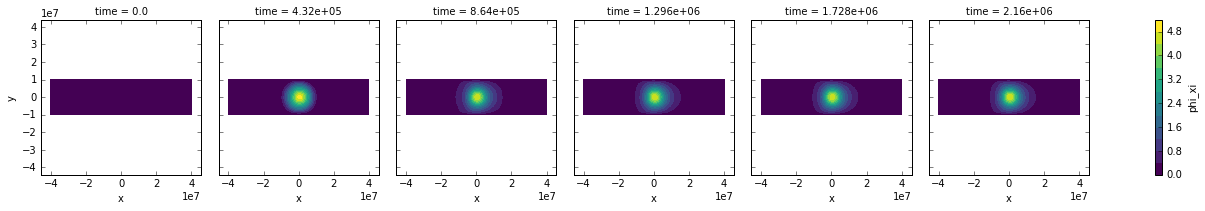

In [47]:
d.phi_xi.isel(alpha=0, beta=0).plot.contourf(x='x', y='y', col='time', subplot_kws={'aspect': 'equal'}, levels=13)

In [43]:
d.time

<xarray.DataArray 'time' (time: 6)>
array([       0.,   432000.,   864000.,  1296000.,  1728000.,  2160000.])
Coordinates:
  * time     (time) float64 0.0 4.32e+05 8.64e+05 1.296e+06 1.728e+06 2.16e+06